# Pandas ‚Äî Exploratory Data Analysis

[Download this "Pandas ‚Äî Exploratory Data Analysis" notebook and other relevant files here](https://melaniewalsh.org/Functions-More-Pandas.zip)

<img src='../images/Pudding-film-dialogue-Mean-Girls.png' width=100%>

Over the next few lessons, we're going work with the film dialogue data behind Hannah Andersen and Matt Daniels's ["Film Dialogue from 2,000 screenplays, Broken Down by Gender and Age"](https://pudding.cool/2017/03/film-dialogue/). These authors claim that their project is a "census rather than a study." In other words, they're not super interested in making analytical arguments. But we're going to use this data to practice developing analytical research questions about culture, specifically films.

<img src='../images/Pudding-Github-data.png' width=100%>

Before we get to developing our research questions, we need to critically examine this [film dialogue data](https://github.com/matthewfdaniels/scripts/), much like we did with the Trans-Atlantic Slave Trade Data. This is a process called Exploratory Data Analysis (EDA). EDA is a common first step in statistics and data science research. It will be an integral first step for us, too. With EDA, we're looking to get a sense of our dataset's general scope as well as potential patterns, anomalies, and problems.

We're going to reinforce some of the Pandas concepts that we learned before as well as introduce a few new things that we can do with Pandas, such as:

- Check for duplicate data
- Check for null/missing values
- Make histogram plots
- Manipulate strings
- Apply functions
- Write a CSV file

# Data Biography

The very first step of a responsible cultural analytics/digital humanities EDA, however, doesn't require any code or computation at all. The very first step is to understand the data's "biography," as Heather Krause lays it out in ["Data Biographies"](https://gijn.org/2017/03/27/data-biographies-getting-to-know-your-data/). Your assignment for Thursday is to make sure you can answer these questions. It will be helpful to read ["FAQ for the ‚ÄúFilm Dialogue, By Gender‚Äù Project](https://medium.com/@matthew_daniels/faq-for-the-film-dialogue-by-gender-project-40078209f751).

### Where did the data come from?

### Who collected the data?

### How was data collected? And how was "gender" calculated?

### Why was the data collected?

# Import Pandas

The rest of our EDA will be accomplished with the help of the Python library Pandas.

In [54]:
import pandas as pd

# Read in CSV File

We will read in our Pudding film dialogue dataset, which we created by merging together a few different datasets that were published by Hannah Andersen and Matt Daniels. This CSV file includes the word **salty**‚Äî'../data/Pudding/Pudding-Film-Dialogue-**Salty**.csv'‚Äîbecause it contains a few artificially added problems and errors. It's inspired by Matthew Lincoln's R Package for artificially creating messy data, [salty](https://rdrr.io/cran/salty/).

In [204]:
pudding_film_df = pd.read_csv('../data/Pudding/Pudding-Film-Dialogue-Salty.csv', delimiter=',', encoding='utf-8')

In [207]:
pudding_film_df.sample(10)

script_id imdb_character_name  words gender   age    imdb_id  \
21672       8431          katsushiro    481      m  31.0  tt0047478   
9418        3033                drew    376      m  29.0  tt0151804   
18999       7243               smith    119      m  20.0  tt0265086   
17918       6611           custodian    440      m  36.0  tt0101545   
5701        2075           dr. gully    235      m  64.0  tt0974014   
21243       8219              claire    180      f  31.0  tt0078444   
20765       8007         sarah stall    110      f   NaN  tt0399146   
10095       3270      captain miller   5134      m  42.0  tt0120815   
7329        2519               julia   1466      f  32.0  tt0093177   
331          708     detective sanch    126      m  40.0  tt0112442   

                       title  year  gross  proportion_of_dialogue  
21672          Seven Samurai  1954    NaN                0.088795  
9418            Office Space  1999   18.0                0.021767  
18999        Black Hawk Down  2001  167.0                0.015562  
17918   Career Opportunities  1991   23.0                0.041018  
5701                Creation  2009    NaN                0.028905  
21243     An Unmarried Woman  1978    NaN                0.017523  
20765  A History of Violence  2005   42.0                0.010272  
10095    Saving Private Ryan  1998  400.0                0.510947  
7329              Hellraiser  1987   32.0                0.199077  
331                 Bad Boys  1995  131.0                0.010584

# Examine the Data

How many rows and columns are in our dataset? What types of data are here? What are the names of the columns?

In [135]:
pudding_film_df.shape

(23052, 10)

In [136]:
pudding_film_df.dtypes

script_id                   int64
imdb_character_name        object
words                       int64
gender                     object
age                       float64
imdb_id                    object
title                      object
year                        int64
gross                     float64
proportion_of_dialogue    float64
dtype: object

In [137]:
pudding_film_df.columns

Index(['script_id', 'imdb_character_name', 'words', 'gender', 'age', 'imdb_id',
       'title', 'year', 'gross', 'proportion_of_dialogue'],
      dtype='object')

## `.describe()`

The `.describe()` method will give you a summary table of all the numerical values in your dataframe.

In [199]:
pudding_film_df.describe()

script_id         words           age  release_year        gross  \
count  23048.000000  23048.000000  18263.000000  23048.000000  19387.00000   
mean    4194.784623    907.871486     42.382960   1998.133070    106.73637   
std     2472.985787   1399.593759     59.718859     14.746058    145.85823   
min      280.000000    101.000000      3.000000   1929.000000      0.00000   
25%     2095.000000    193.000000     30.000000   1992.000000     22.00000   
50%     3694.000000    396.000000     39.000000   2001.000000     56.00000   
75%     6219.750000    980.000000     50.000000   2009.000000    136.00000   
max     9254.000000  28102.000000   2013.000000   2015.000000   1798.00000   

       proportion_of_dialogue  
count            23048.000000  
mean                 0.086515  
std                  0.107745  
min                  0.001537  
25%                  0.019771  
50%                  0.042421  
75%                  0.104166  
max                  0.923422

Do you notice any outliers, anomalies, or potential problems here?

In [200]:
pudding_film_df[pudding_film_df['age'] == 2013]

script_id      character  words gender     age  \
11639       3737  Lucas Solomon    190    Man  2013.0   

                         title  release_year  gross  proportion_of_dialogue  \
11639  The Wolf of Wall Street          2013  125.0                0.011077   

       after_2000  
11639        True

# Rename and Drop Columns

EDA often includes renaming and dropping columns to make the data easier to work with and more legible.

In [211]:
pudding_film_df = pudding_film_df.rename(columns={'imdb_character_name': 'character', 'year': 'release_year'})

In [212]:
pudding_film_df.head()

script_id        character  words gender   age    imdb_id  \
0        280            betty    311      f  35.0  tt0112579   
1        280  carolyn johnson    873      f   NaN  tt0112579   
2        280          eleanor    138      f   NaN  tt0112579   
3        280  francesca johns   2251      f  46.0  tt0112579   
4        280            madge    190      f  46.0  tt0112579   

                           title  release_year  gross  proportion_of_dialogue  
0  The Bridges of Madison County          1995  142.0                0.048639  
1  The Bridges of Madison County          1995  142.0                0.136534  
2  The Bridges of Madison County          1995  142.0                0.021583  
3  The Bridges of Madison County          1995  142.0                0.352049  
4  The Bridges of Madison County          1995  142.0                0.029715

In [213]:
pudding_film_df = pudding_film_df.drop(columns='imdb_id')

# Check for Duplicates or Missing Values (`NaN`)

## Duplicates

You can check for duplicate rows by using the `.duplicated()` method and seting the parameter `keep=False` (which will display both duplicated values as opposed to only the first value `keep='first'` or the last value `keep='last'`).

In [214]:
pudding_film_df.duplicated(keep=False)

0        False
1        False
2        False
3        False
4        False
         ...  
23047    False
23048    False
23049     True
23050    False
23051     True
Length: 23052, dtype: bool

The output above is reporting whether each row in the dataset is a duplicate `True` or not `False`. We can use the `.duplicated()` method inside a filter to isolate only the rows in the dataframe that are exact duplicates.

In [215]:
pudding_film_df[pudding_film_df.duplicated(keep=False)]

script_id      character  words gender   age  \
21001       8099          c-3po    138      m  69.0   
21002       8099          c-3po    138      m  69.0   
21963       8560  kilgore trout   2673      m  63.0   
21964       8560  kilgore trout   2673      m  63.0   
22935       9222   groomsman #5    238      m   NaN   
22936       9222   groomsman #5    238      m   NaN   
23049       9254     mrs. potts    564      f  66.0   
23051       9254     mrs. potts    564      f  66.0   

                                            title  release_year  gross  \
21001  Star Wars: Episode VII - The Force Awakens          2015  927.0   
21002  Star Wars: Episode VII - The Force Awakens          2015  927.0   
21963                      Breakfast of Champions          1999    NaN   
21964                      Breakfast of Champions          1999    NaN   
22935                            Wedding Crashers          2005  283.0   
22936                            Wedding Crashers          2005  283.0   
23049                        Beauty and the Beast          1991  452.0   
23051                        Beauty and the Beast          1991  452.0   

       proportion_of_dialogue  
21001                0.020702  
21002                0.020702  
21963                0.197211  
21964                0.197211  
22935                0.012032  
22936                0.012032  
23049                0.055517  
23051                0.055517

You can drop duplicates from the dataframe with the `.drop_duplicates()` method and choose to "keep" the "first" instance of the duplicate or the "last" instance.

In [216]:
pudding_film_df = pudding_film_df.drop_duplicates(keep='first')

Now if we check the data for duplicates again, they should be all gone.

In [217]:
pudding_film_df[pudding_film_df.duplicated(keep=False)]

Empty DataFrame
Columns: [script_id, character, words, gender, age, title, release_year, gross, proportion_of_dialogue]
Index: []

## Missing/Null Values

Missing values in a Pandas dataframe are interpreted as a special `NaN` value. This is important to remember for a few reasons.

First, if we want to find out how many rows in our dataset contain blank or missing values, we'll need to use a special `.isnull()` method that checks for `NaN` values. If we check for missing values in our "character" column, for example, we will discover that there are two rows that don't have any character names.

In [218]:
pudding_film_df['character'].isnull() == True

0        False
1        False
2        False
3        False
4        False
         ...  
23046    False
23047    False
23048    False
23049    False
23050    False
Name: character, Length: 23048, dtype: bool

In [219]:
pudding_film_df[pudding_film_df['character'].isnull() == True]

script_id character  words gender  age           title  release_year  \
4656        1807       NaN    146      f  NaN         Beloved          1998   
19448       7445       NaN    520      f  NaN  House of Games          1987   

       gross  proportion_of_dialogue  
4656    42.0                0.005162  
19448    5.0                0.165184

This is important information for the sake of better understanding our dataset. But it's also important because `NaN` values can mess up later calculations or transformations that you might attempt. For this reason, we're going to replace or "fill" these `NaN` values with the string "No Character Data" by using the `.fillna()` method.

In [149]:
pudding_film_df['character'] = pudding_film_df['character'].fillna('No Character Data')

In [150]:
pudding_film_df[pudding_film_df['character'].isnull() == True]

Empty DataFrame
Columns: [script_id, character, words, gender, age, title, release_year, gross, proportion_of_dialogue]
Index: []

In [151]:
pudding_film_df[pudding_film_df['character'] == 'No Character Data']

script_id          character  words gender  age           title  \
4656        1807  No Character Data    146      f  NaN         Beloved   
19448       7445  No Character Data    520      f  NaN  House of Games   

       release_year  gross  proportion_of_dialogue  
4656           1998   42.0                0.005162  
19448          1987    5.0                0.165184

With the `.isnull()` method, we can also discover that there are thousands of rows that don't contain any box office gross information as well as thousands of characters that don't have any associated age information.

In [152]:
pudding_film_df[pudding_film_df['gross'].isnull() == True]

script_id        character  words gender   age  \
59           640  buckaroo banzai   1723      m  37.0   
60           640  general catburd    334      m  54.0   
61           640  highway patrolm    126      m  36.0   
62           640      john emdall    226      f  46.0   
63           640  lord john whorf    330      m  39.0   
...          ...              ...    ...    ...   ...   
22917       9214          michael    554      m   NaN   
22918       9214          mr gold   1066      m   NaN   
22919       9214         mrs gold    828      f   NaN   
22920       9214        ms newman    492      f   NaN   
22921       9214  sheriff dan pat   1820      m  56.0   

                                                   title  release_year  gross  \
59     The Adventures of Buckaroo Banzai Across the 8...          1984    NaN   
60     The Adventures of Buckaroo Banzai Across the 8...          1984    NaN   
61     The Adventures of Buckaroo Banzai Across the 8...          1984    NaN   
62     The Adventures of Buckaroo Banzai Across the 8...          1984    NaN   
63     The Adventures of Buckaroo Banzai Across the 8...          1984    NaN   
...                                                  ...           ...    ...   
22917                            The Utah Murder Project          2006    NaN   
22918                            The Utah Murder Project          2006    NaN   
22919                            The Utah Murder Project          2006    NaN   
22920                            The Utah Murder Project          2006    NaN   
22921                            The Utah Murder Project          2006    NaN   

       proportion_of_dialogue  
59                   0.280985  
60                   0.054468  
61                   0.020548  
62                   0.036856  
63                   0.053816  
...                       ...  
22917                0.048317  
22918                0.092971  
22919                0.072214  
22920                0.042909  
22921                0.158730  

[3661 rows x 9 columns]

In [153]:
pudding_film_df[pudding_film_df['age'].isnull() == True]

script_id        character  words gender  age  \
1            280  carolyn johnson    873      f  NaN   
2            280          eleanor    138      f  NaN   
7            623     bobby korfin    328      m  NaN   
9            623  deputy chief fi    347      m  NaN   
15           623  honey the hooke    148      f  NaN   
...          ...              ...    ...    ...  ...   
23020       9247   helen holloway    124      f  NaN   
23024       9247         lbj aide    317      m  NaN   
23029       9247  senator kasseba    129      f  NaN   
23031       9253     girl in pool    118      f  NaN   
23045       9254            lefou    415      m  NaN   

                               title  release_year  gross  \
1      The Bridges of Madison County          1995  142.0   
2      The Bridges of Madison County          1995  142.0   
7                         15 Minutes          2001   37.0   
9                         15 Minutes          2001   37.0   
15                        15 Minutes          2001   37.0   
...                              ...           ...    ...   
23020        Lee Daniels' The Butler          2013  125.0   
23024        Lee Daniels' The Butler          2013  125.0   
23029        Lee Daniels' The Butler          2013  125.0   
23031                      Let Me In          2010   13.0   
23045           Beauty and the Beast          1991  452.0   

       proportion_of_dialogue  
1                    0.136534  
2                    0.021583  
7                    0.036012  
9                    0.038098  
15                   0.016249  
...                       ...  
23020                0.013358  
23024                0.034148  
23029                0.013896  
23031                0.035192  
23045                0.040850  

[4785 rows x 9 columns]

# Check Distributions of Data

## `.hist()`

One quick way to get a sense of the distributions of your data is with the [`hist()` method](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.hist.html#pandas.DataFrame.hist), which creates a "histogram" of every numerical category in your dataframe. A histogram is a chart the represents the frequency of each value. A histogram looks a lot like a bar chart ‚Äî and it *is* a lot like a bar chart ‚Äî except a histogram represents quantitative values as opposed to qualitative values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12220d7d0>,
      dtype=object)

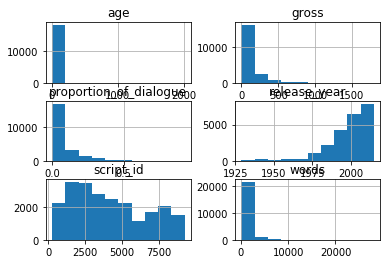

In [154]:
pudding_film_df.hist()

If you use the parameter `figsize(x_size, y_size)` and specify specific sizes, you can make the grid of histogram charts bigger.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x123c15850>,
      dtype=object)

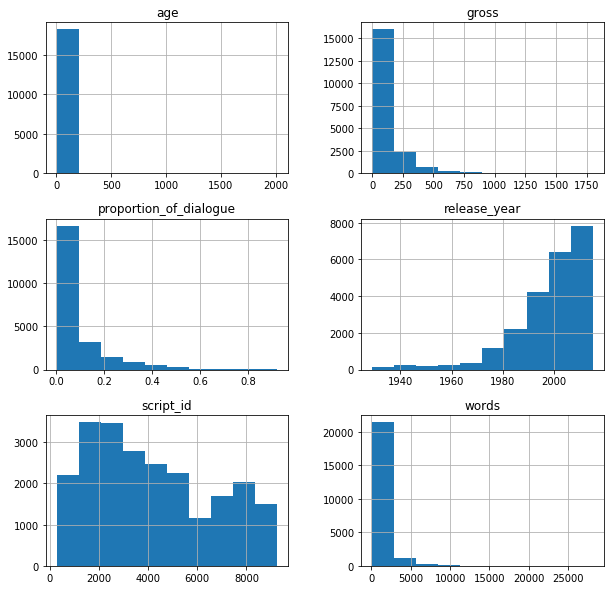

In [159]:
pudding_film_df.hist(figsize=(10,10))

You can also select individual columns and plot histograms based on that column. 

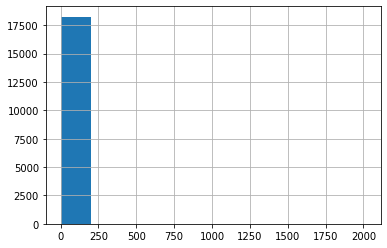

In [75]:
pudding_film_df['age'].hist()

If you add in the `range= (x_size, y_size)` parameter, you can focus your histogram on a specific area.

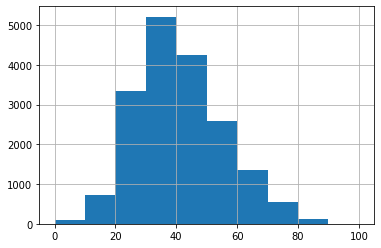

In [163]:
pudding_film_df['age'].hist(range=(0, 100))

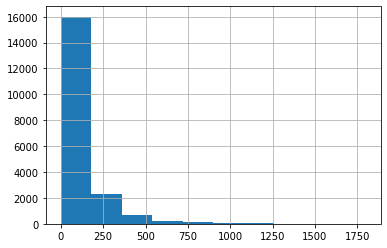

In [77]:
pudding_film_df['gross'].hist()

You can also specify how finely to group the data with the `bins` parameter. You might think about it like putting the data into a bunch of physical bins üóëÔ∏è  If we set the `bins` parameter to 100, we can a more nuanced view of the box office gross distribution.

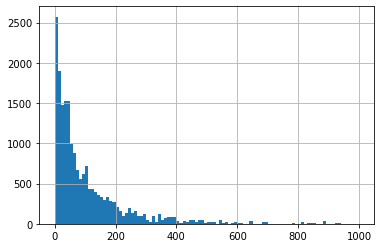

In [78]:
pudding_film_df['gross'].hist(bins=100, range=(0, 1000))

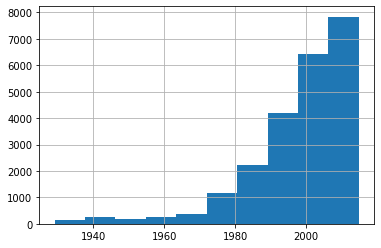

In [121]:
pudding_film_df['release_year'].hist()

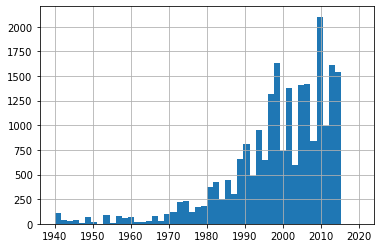

In [165]:
pudding_film_df['release_year'].hist(bins=50, range=(1940, 2020))

If you specifically select a column that contains qualitative data as opposed to quantitative data, you can also force Pandas to make a histogram.

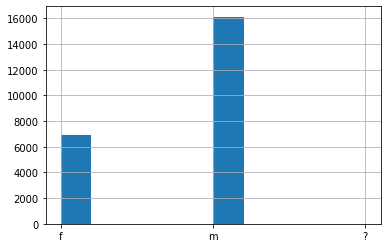

In [80]:
pudding_film_df['gender'].hist()

# Clean and Transform Data

## Pandas `.str` Methods

| **Pandas String Method** | **Explanation**                                                                                   |
|:-------------:|:---------------------------------------------------------------------------------------------------:|
| `pandas_column.str.lower()`         | makes the string in each row lowercase                                                                                |
| `pandas_column.str.upper()`         | makes the string in each row uppercase                                                |
| `pandas_column.str.title()`         | makes the string in each row titlecase                                                |
| `pandas_column.str.replace('old string', 'new string')`      | replaces `old string` with `new string` for each row |
| `pandas_column.str.contains('some string')`      | tests whether string in each row contains "some string" |
| `pandas_column.str.split('delim')`          | returns a list of substrings separated by the given delimiter |
| `pandas_column.str.join(list)`         | opposite of split(), joins the elements in the given list together using the string                                                                        |
                                                            

Remember all the special things that you can do with string data aka [string methods](https://melaniewalsh.github.io/Intro-Cultural-Analytics/Python/String-Methods.html)? Well Pandas columns that contain string data also have special [Pandas string methods](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#string-methods). Many of them are the same or almost the same as regular Python string methods, except  they will transform every single string value in a column, and you have to add the code `.str` to the method chain.

For example, to transform every character's name in the "character" column from lowercase to uppercase, you can add `.str.upper()` to `pudding_film_df['character']`

In [168]:
pudding_film_df['character'] = pudding_film_df['character'].str.upper()

In [169]:
pudding_film_df.head()

script_id        character  words gender   age  \
0        280            BETTY    311      f  35.0   
1        280  CAROLYN JOHNSON    873      f   NaN   
2        280          ELEANOR    138      f   NaN   
3        280  FRANCESCA JOHNS   2251      f  46.0   
4        280            MADGE    190      f  46.0   

                           title  release_year  gross  proportion_of_dialogue  
0  The Bridges of Madison County          1995  142.0                0.048639  
1  The Bridges of Madison County          1995  142.0                0.136534  
2  The Bridges of Madison County          1995  142.0                0.021583  
3  The Bridges of Madison County          1995  142.0                0.352049  
4  The Bridges of Madison County          1995  142.0                0.029715

To transform every character's name in the "character" column back to lowercase, you can add`.str.lower()` to `pudding_film_df['character']`

In [170]:
pudding_film_df['character'] = pudding_film_df['character'].str.lower()

In [171]:
pudding_film_df.sample(10)

script_id        character  words gender   age  \
18089       6727  eddie valentine    447      m  52.0   
20332       7849  sgt. jerry woot   1448      m  33.0   
10910       3500    freddie miles    958      m  32.0   
16358       5482             gran    325      f  87.0   
15780       5342      doug butabi   5399      m  28.0   
536          761    rawlie thorpe    118      m  40.0   
9870        3189      teenage boy    368      m   NaN   
12871       4236            sissy    289      f  28.0   
7847        2642      mrs. bailey    133      f  57.0   
18198       6833              ian    235      m  43.0   

                                      title  release_year  gross  \
18089                         The Rocketeer          1991   96.0   
20332                        Gangster Squad          2013   49.0   
10910               The Talented Mr. Ripley          1999  139.0   
16358                            The Croods          2013  200.0   
15780                A Night at the Roxbury          1998   56.0   
536             The Bonfire of the Vanities          1990   32.0   
9870                        Red Riding Hood          2011   41.0   
12871  Jason Lives: Friday the 13th Part VI          1986   44.0   
7847                  It's a Wonderful Life          1946    NaN   
18198                           Match Point          2005   31.0   

       proportion_of_dialogue  
18089                0.054426  
20332                0.152985  
10910                0.043223  
16358                0.045493  
15780                0.369061  
536                  0.008302  
9870                 0.019562  
12871                0.054569  
7847                 0.009724  
18198                0.011876

If we want to replace the gender columns's single letter abbreviation for "male" / "female" (sex) with "man" / "woman" (gender identity), we could use the `.str.replace()` method. 

In [172]:
pudding_film_df['gender'] = pudding_film_df['gender'].str.replace('m', 'man')

In [173]:
pudding_film_df['gender'] = pudding_film_df['gender'].str.replace('f', 'woman')

In [174]:
pudding_film_df.sample(10)

script_id        character  words gender   age  \
2715        1291      max fischer   2983    man  18.0   
10196       3294     mr. universe    750    man  27.0   
14438       4787  chief weirzbows    679    man  55.0   
19760       7607  miranda sampson    287  woman  24.0   
16612       5528          kerchak    250    man  59.0   
1684        1036     willie scott   1564  woman  31.0   
7318        2510        mc hammer   6342    man   NaN   
6835        2358           waiter    168    man   NaN   
13905       4596           javier    548    man  57.0   
4853        1863  barbara buckley    538  woman  27.0   

                                      title  release_year  gross  \
2715                               Rushmore          1998   31.0   
10196                              Serenity          2005   34.0   
14438            The Place Beyond the Pines          2012   23.0   
19760                                Harper          1966    NaN   
16612                                Tarzan          1999  292.0   
1684   Indiana Jones and the Temple of Doom          1984  466.0   
7318                      The Hebrew Hammer          2003    NaN   
6835                                 Game 6          2005    NaN   
13905                   Maria Full of Grace          2004    9.0   
4853                                   Blow          2001   81.0   

       proportion_of_dialogue  
2715                 0.552101  
10196                0.025805  
14438                0.062231  
19760                0.127216  
16612                0.055175  
1684                 0.298359  
7318                 0.438226  
6835                 0.010474  
13905                0.068509  
4853                 0.021450

We can also use the `.str.contains()` to search for particular words or phrases in a column, such as "Star Wars" or "Mean Girls".

In [176]:
pudding_film_df[pudding_film_df['title'].str.contains('Star Wars')]

script_id        character  words gender   age  \
3017        1359   admiral ackbar    199    man  61.0   
3018        1359  ben 'obi-wan' k    462    man  69.0   
3019        1359            c-3po    881    man  37.0   
3020        1359      darth vader    381    man  48.0   
3021        1359         han solo    835    man  41.0   
...          ...              ...    ...    ...   ...   
21008       8099      poe dameron    604    man  36.0   
21009       8099    princess leia    252  woman  59.0   
21010       8099              rey   1363  woman  23.0   
21011       8099     stormtrooper    114    man   NaN   
21012       8099  supreme leader     168    man  51.0   

                                            title  release_year  gross  \
3017   Star Wars: Episode VI - Return of the Jedi          1983  853.0   
3018   Star Wars: Episode VI - Return of the Jedi          1983  853.0   
3019   Star Wars: Episode VI - Return of the Jedi          1983  853.0   
3020   Star Wars: Episode VI - Return of the Jedi          1983  853.0   
3021   Star Wars: Episode VI - Return of the Jedi          1983  853.0   
...                                           ...           ...    ...   
21008  Star Wars: Episode VII - The Force Awakens          2015  927.0   
21009  Star Wars: Episode VII - The Force Awakens          2015  927.0   
21010  Star Wars: Episode VII - The Force Awakens          2015  927.0   
21011  Star Wars: Episode VII - The Force Awakens          2015  927.0   
21012  Star Wars: Episode VII - The Force Awakens          2015  927.0   

       proportion_of_dialogue  
3017                 0.039096  
3018                 0.090766  
3019                 0.173084  
3020                 0.074853  
3021                 0.164047  
...                       ...  
21008                0.090609  
21009                0.037804  
21010                0.204470  
21011                0.017102  
21012                0.025203  

[97 rows x 9 columns]

In [177]:
pudding_film_df[pudding_film_df['title'].str.contains('Mean Girls')]

script_id        character  words gender   age       title  \
13938       4605    aaron samuels    426    man  23.0  Mean Girls   
13939       4605       cady heron   2798  woman  18.0  Mean Girls   
13940       4605           damian    624    man  26.0  Mean Girls   
13941       4605  gretchen wiener    609  woman  22.0  Mean Girls   
13942       4605        janis ian    907  woman  22.0  Mean Girls   
13943       4605      karen smith    301  woman  19.0  Mean Girls   
13944       4605       mr. duvall    365    man  43.0  Mean Girls   
13945       4605      mrs. george    125  woman  33.0  Mean Girls   
13946       4605      ms. norbury    720  woman  34.0  Mean Girls   
13947       4605    regina george   1030  woman  26.0  Mean Girls   

       release_year  gross  proportion_of_dialogue  
13938          2004  120.0                0.053890  
13939          2004  120.0                0.353953  
13940          2004  120.0                0.078937  
13941          2004  120.0                0.077040  
13942          2004  120.0                0.114738  
13943          2004  120.0                0.038077  
13944          2004  120.0                0.046173  
13945          2004  120.0                0.015813  
13946          2004  120.0                0.091082  
13947          2004  120.0                0.130297

## Applying Functions

With the `.apply()` method, you can run a function on every single row in a Pandas column or dataframe.

In [178]:
def make_text_lower_case(text):
    lower_case_text = text.upper()
    return lower_case_text

In [220]:
def make_text_upper_case(text):
    upper_case_text = text.upper()
    return upper_case_text

In [180]:
def make_text_title_case(text):
    title_case_text = text.title()
    return title_case_text

In [221]:
make_text_upper_case("betty")

'BETTY'

In [181]:
pudding_film_df['character'].apply(make_text_upper_case)

0                  BETTY
1        CAROLYN JOHNSON
2                ELEANOR
3        FRANCESCA JOHNS
4                  MADGE
              ...       
23046            LUMIERE
23047            MAURICE
23048    MONSIEUR D'ARQU
23049         MRS. POTTS
23050           WARDROBE
Name: character, Length: 23048, dtype: object

In [182]:
pudding_film_df['character'].apply(make_text_title_case)

0                  Betty
1        Carolyn Johnson
2                Eleanor
3        Francesca Johns
4                  Madge
              ...       
23046            Lumiere
23047            Maurice
23048    Monsieur D'Arqu
23049         Mrs. Potts
23050           Wardrobe
Name: character, Length: 23048, dtype: object

In [183]:
pudding_film_df['character'] = pudding_film_df['character'].apply(make_text_title_case)

In [184]:
pudding_film_df.sample(10)

script_id        character  words gender   age  \
16354       5481      Mr. Pickles    556    man  37.0   
4089        1652  Scott Macnamara    254    man  79.0   
20974       8089      Marty Baron   1143    man  48.0   
15421       5164  Dr. Carlisle Cu    318    man  36.0   
11942       3866      Dick Liddil    719    man  31.0   
5313        1973  Film Commission    408    man   NaN   
7729        2613    Lydia Maxwell   1010  woman  26.0   
21155       8192      Rob Hawkins   2026    man  26.0   
12738       4190       Zeke Tyler    421    man  20.0   
19801       7627     David Ershon    110    man  45.0   

                                                   title  release_year  gross  \
16354                                      The Boxtrolls          2014   54.0   
4089                                        Analyze This          1999  183.0   
20974                                          Spotlight          2015   35.0   
15421                        The Twilight Saga: New Moon          2009  344.0   
11942  The Assassination of Jesse James by the Coward...          2007    4.0   
5313                                   Cecil B. DeMented          2000    2.0   
7729                                          Innerspace          1987   57.0   
21155                                        Cloverfield          2008   96.0   
12738                                        The Faculty          1998   74.0   
19801                                     The Other Guys          2010  131.0   

       proportion_of_dialogue  
16354                0.106289  
4089                 0.008807  
20974                0.081266  
15421                0.017614  
11942                0.073062  
5313                 0.052530  
7729                 0.133070  
21155                0.291721  
12738                0.067631  
19801                0.010366

In [185]:
def clarify_gender(text):
    gender = ''
    if text == 'woman':
        gender = 'Woman'
    elif text == 'man':
        gender = 'Man'
    return gender

In [186]:
def calculate_after_2000(year):
    is_millennium = ''
    if year >= 2000:
        is_millennium = True
    elif year < 2000:
        is_millennium = False
    return is_millennium

In [187]:
pudding_film_df['gender'] = pudding_film_df['gender'].apply(clarify_gender)

In [188]:
pudding_film_df.head()

script_id        character  words gender   age  \
0        280            Betty    311  Woman  35.0   
1        280  Carolyn Johnson    873  Woman   NaN   
2        280          Eleanor    138  Woman   NaN   
3        280  Francesca Johns   2251  Woman  46.0   
4        280            Madge    190  Woman  46.0   

                           title  release_year  gross  proportion_of_dialogue  
0  The Bridges of Madison County          1995  142.0                0.048639  
1  The Bridges of Madison County          1995  142.0                0.136534  
2  The Bridges of Madison County          1995  142.0                0.021583  
3  The Bridges of Madison County          1995  142.0                0.352049  
4  The Bridges of Madison County          1995  142.0                0.029715

In [189]:
pudding_film_df['after_2000'] = pudding_film_df['release_year'].apply(calculate_after_2000)

In [190]:
pudding_film_df.head()

script_id        character  words gender   age  \
0        280            Betty    311  Woman  35.0   
1        280  Carolyn Johnson    873  Woman   NaN   
2        280          Eleanor    138  Woman   NaN   
3        280  Francesca Johns   2251  Woman  46.0   
4        280            Madge    190  Woman  46.0   

                           title  release_year  gross  proportion_of_dialogue  \
0  The Bridges of Madison County          1995  142.0                0.048639   
1  The Bridges of Madison County          1995  142.0                0.136534   
2  The Bridges of Madison County          1995  142.0                0.021583   
3  The Bridges of Madison County          1995  142.0                0.352049   
4  The Bridges of Madison County          1995  142.0                0.029715   

   after_2000  
0       False  
1       False  
2       False  
3       False  
4       False

# Write to CSV

To write a dataframe to a new CSV file, you can add the `.to_csv()` method after the name of your dataframe.

`your_dataframe.to_csv('Your-Desired-File-Name', encoding='utf-8', sep=',', index=False)`

In [198]:
pudding_film_df.to_csv('../data/Pudding/Pudding-Film-Dialogue-Clean.csv', encoding='utf-8', sep=',', index=False)